In [110]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
plt.style.use('dark_background')

In [111]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(28, 28)


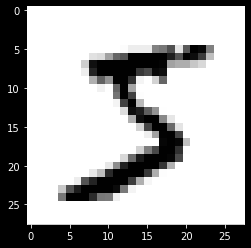

In [112]:
image_A = train_images[0]
print(image_A.shape)
plt.imshow(image_A, cmap = plt.cm.binary)

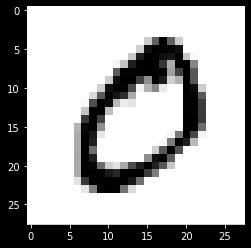

In [113]:
image_B = train_images[1]
plt.imshow(image_B, cmap = plt.cm.binary)

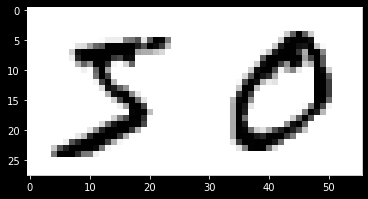

In [114]:
images_A_and_B = np.hstack((image_A, image_B))
plt.imshow(images_A_and_B, cmap = plt.cm.binary)

In [115]:
# Create mini training set so that it's not too computationally intensive
mini_size = 500
mini_X_train, mini_X_test, mini_y_train, mini_y_test = train_images[:mini_size], train_images[mini_size:mini_size*2],  train_labels[:mini_size], train_labels[mini_size:mini_size*2]



In [116]:
num_images = mini_X_train.shape[0]
index_list = np.linspace(0,num_images-1,num_images).astype(int)
image_combinations = list(itertools.combinations(index_list, 2))

In [117]:
# First just try putting them one on top of the other
concatenated_dataset_X = []
concatenated_dataset_y = []

for combination in image_combinations:
#     print(combination)
    
    index_A = combination[0]
    index_B = combination[1]
    
    image_A = mini_X_train[index_A]
    image_B = mini_X_train[index_B]
    
    intermediate_label_A = mini_y_train[index_A]
    intermediate_label_B = mini_y_train[index_B]
    
    concatenated_images = np.hstack((image_A, image_B))
    
    final_label = min(intermediate_label_A, intermediate_label_B)
    
    concatenated_dataset_X.append(concatenated_images)
    concatenated_dataset_y.append(final_label)

In [123]:
num_images = mini_X_test.shape[0]
index_list = np.linspace(0,num_images-1,num_images).astype(int)
image_combinations = list(itertools.combinations(index_list, 2))

In [124]:
# As above for test
concatenated_dataset_X_test = []
concatenated_dataset_y_test = []

for combination in image_combinations:
#     print(combination)
    
    index_A = combination[0]
    index_B = combination[1]
    
    image_A = mini_X_test[index_A]
    image_B = mini_X_test[index_B]
    
    intermediate_label_A = mini_y_test[index_A]
    intermediate_label_B = mini_y_test[index_B]
    
    concatenated_images = np.hstack((image_A, image_B))
    
    final_label = min(intermediate_label_A, intermediate_label_B)
    
    concatenated_dataset_X_test.append(concatenated_images)
    concatenated_dataset_y_test.append(final_label)

In [127]:
# To array
concatenated_dataset_X = np.array(concatenated_dataset_X)
concatenated_dataset_y = np.array(concatenated_dataset_y)

concatenated_dataset_X_test = np.array(concatenated_dataset_X_test)
concatenated_dataset_y_test = np.array(concatenated_dataset_y_test)

print(concatenated_dataset_X.shape)
print(concatenated_dataset_X_test.shape)

(124750, 28, 56)
(124750, 28, 56)


In [138]:
train_images = concatenated_dataset_X.reshape((124750, 28, 56, 1))
train_images = train_images.astype('float32')/ 255

test_images = concatenated_dataset_X_test.reshape((124750, 28, 56, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(concatenated_dataset_y)
test_labels = to_categorical(concatenated_dataset_y_test)

In [142]:
# Check shapes
print(train_images.shape)
print(train_labels.shape)

(124750, 28, 56, 1)
(124750, 10)


In [143]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,56,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# Adding a classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [144]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 27, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 12, 64)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 10, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [145]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [146]:
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
1950/1950 [==============================] - 96s 49ms/step - loss: 0.0832 - accuracy: 0.9725
Epoch 2/5
1950/1950 [==============================] - 103s 53ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 3/5
1950/1950 [==============================] - 99s 51ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 4/5
1950/1950 [==============================] - 99s 51ms/step - loss: 5.7797e-04 - accuracy: 0.9999
Epoch 5/5
1950/1950 [==============================] - 102s 53ms/step - loss: 4.4550e-04 - accuracy: 0.9999


In [147]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

3899/3899 [==============================] - 15s 4ms/step - loss: 3.4895 - accuracy: 0.8645


0.8644729256629944